## Sample uniform priors to check jump proposals!

In [30]:
import numpy as np
from impulse.impulse import sample
import matplotlib.pyplot as plt
from emcee.autocorr import integrated_time

In [20]:
def lnpost(x0):
    if np.any(x0 < 0.) | np.any(x0 > 1.):
        return -np.inf

    return 1

In [23]:
ndim = 5
x0 = np.random.uniform(size=5)

In [24]:
chain = sample(lnpost, ndim, x0, num_samples=1_000_000)

100%|██████████| 990/990 [00:48<00:00, 20.38it/s]


In [27]:
chain.shape

(1000000, 5)

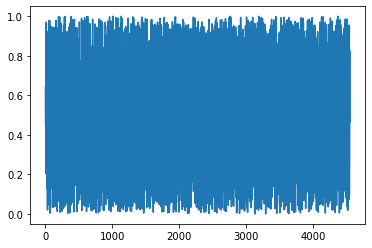

In [39]:
plt.plot(chain[::220, 0])
plt.show()

In [31]:
integrated_time(chain[:, 0])

array([22.67107998])

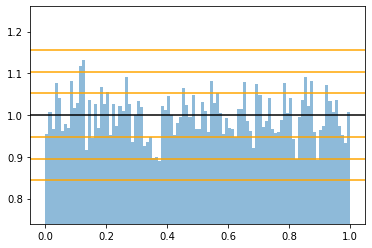

In [63]:
counts, bins, __ = plt.hist(chain[::22, 0], bins=100, density=True, alpha=0.5)
mean = np.mean(counts)
sigma = np.std(counts)
plt.axhline(mean, color='k')
for i in range(1, 4):
    plt.axhline(mean + i * sigma, color='orange')
    plt.axhline(mean - i * sigma, color='orange')
plt.ylim([mean - 5 * sigma, mean + 5 * sigma])
plt.axhline()
plt.axhline
plt.show()

In [74]:
import pickle, json
from enterprise_extensions.models import model_2a
from enterprise.signals.parameter import sample as sample_params

In [70]:
with open('/Users/aaron/Documents/GitHub/12p5yr_stochastic_analysis/data/psrs.pkl', 'rb') as f:
    psrs = pickle.load(f)

with open('/Users/aaron/Documents/GitHub/12p5yr_stochastic_analysis/data/channelized_12p5yr_v3_full_noisedict.json', 'r') as f:
    params = json.load(f)

In [73]:
pta = model_2a(psrs, noisedict=params, gamma_common=4.33, n_gwbfreqs=5, tm_marg=True)

In [75]:
x0 = np.array(list(sample_params(pta.params).values()))

In [77]:
chain = sample(pta.get_lnprior, len(pta.params), x0, num_samples=1_000_000)

  8%|▊         | 82/990 [01:24<15:32,  1.03s/it]


LinAlgError: Matrix is not positive definite